In [1]:
# IMPORTING REQUIRED LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
def compute_cost(X,Y,theta):
    '''
    compute_cost is a function, which is used to
    calculate the cost function of linear regression.

    X = (m,1)
    Y = (m,1)
    theta = (n,1)
    '''
    
    # m = number of training examples
    m = Y.shape[0]
    
    # J_theta = cost function
    J_theta = (1/(2*m)) * np.sum((np.dot(X,theta) - Y)**2)
    
    return J_theta

In [3]:
def gradient_descent(X,Y,theta,alpha,num_iters):
    '''
    gradient_descent is a function, which is used to
    calculate the gradient_descent of linear regression.

    X = (m,1)
    Y = (m,1)
    theta = (n,1)
    alpha = learning rate
    num_iters = number of iterations
    '''
    # m = number of training examples
    m = Y.shape[0]
    
    J_hystory = np.zeros((num_iters, 1))
    for i in range(num_iters):
        
        error = np.dot(X,theta) - Y
        temp0 = theta[0][0] - (alpha /m ) * np.sum(error * X[:,0].reshape(m,1))
        temp1 = theta[1][0] - ( alpha /m ) * np.sum(error * X[:,1].reshape(m,1))
        theta = np.array([temp0,temp1]).reshape(2,1)
        
        # recent j_theta value = J_hystory
        J_hystory[i,0] =  compute_cost(X,Y,theta)
    return theta,J_hystory

In [4]:
def plotdata(X,Y,marker):
    '''
    X = (m,1)
    Y = (m,1)
    '''
    
    fig = plt.plot(X,Y,marker)
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel('Profit in $10,000s')
    plt.legend(labels = ['Training data', 'Linear regression'],loc = 4)
    return fig

In [5]:
data = np.loadtxt('foodTruck_profit.txt',delimiter=',')

STARTING ALGORITHAM....
With theta = [0 ; 0], Cost computed :  32.072733877455676
With theta = [-1 ; 2], Cost computed :  54.24245508201238
Theta found by gradient descent :  [[-3.63029144]
 [ 1.16636235]]
For population = 35,000, we predict a profit of :  [[4519.7678677]]
For population = 70,000, we predict a profit of :  [[45342.45012945]]


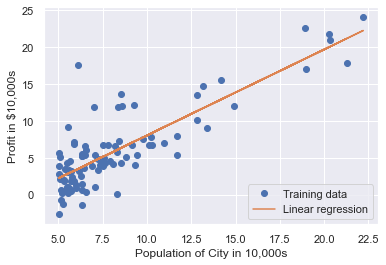

In [6]:

print('STARTING ALGORITHAM....')

# assigning population to X AND profit to Y
X = data[:,0:1]                                
Y = data[:,1:]


# m = number of training examples
m = Y.shape[0]



# PLOTING THE DATA
plotdata(X,Y,'o')



# adding row vector of 1's to X
X_1 = np.ones((m, 2))
X_1[:, 1:2] = X


# initializing the theta
theta = np.zeros((2,1))



# INITIALIZING THE HYPERPARAMETERS
iterations = 1500
alpha = 0.01



# 1'ST TESTING THE COMPUTE_COST()
J = compute_cost(X_1,Y,theta)
print('With theta = [0 ; 0], Cost computed : ', J)



# 2'ND TESTING THE COMPUTE_COST()
J = compute_cost(X_1, Y, np.array([-1,2]).reshape(2,1))
print('With theta = [-1 ; 2], Cost computed : ', J)




# run gradient descent
theta, J_hystory = gradient_descent(X_1, Y, theta, alpha, iterations)
print('Theta found by gradient descent : ', theta)




# PLOT THE LINEAR FIT
plotdata(X_1[:,1].reshape(m,1),np.dot(X_1,theta),'-')




# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]).reshape(1,2),theta)
print('For population = 35,000, we predict a profit of : ', predict1*10000)



predict2 = np.dot(np.array([1, 7]).reshape(1,2),theta)
print('For population = 70,000, we predict a profit of : ', predict2*10000)
